### Shrinkage curvature calculation based on section 3.1.4 Creep and shrinkage of the EC2

(6) The total shrinkage strain is composed of two components, the drying shrinkage strain and
the autogenous shrinkage strain. The drying shrinkage strain develops slowly, since it is a
function of the migration of the water through the hardened concrete. The autogenous
shrinkage strain develops during hardening of the concrete: the major part therefore develops in
the early days after casting. Autogenous shrinkage is a linear function of the concrete strength.
It should be considered specifically when new concrete is cast against hardened concrete.
Hence the values of the total shrinkage strain $\varepsilon_{cs}$ follow from

$$ \varepsilon_{cs} = \varepsilon_{cd} + \varepsilon_{ca} \hspace{10cm}           (3.8) $$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $\varepsilon_{cs}$ | - | is the total shrinkage strain|
| $\varepsilon_{cd}$ | - | is the drying shrinkage strain |
| $\varepsilon_{ca}$ | - | is the autogenous shrinkage strain |

The development of the drying shrinkage strain in time follows from:

 $$\varepsilon_{cd}(t) = \beta_{ds}{(t, t_s)} . k_h . \varepsilon_{cd,0} \hspace{10cm}(3.9)$$               

Table 3.3 Values for kh in Expression (3.9)

| Symbol | Unit | Description
| :-: | :-: | :- |
| $k_h$ | - | is a coefficient depending on the notional size ho according to Table 3.3|
| $\varepsilon_{cd,0}$ | - | nominal unrestrained drying shrinkage values $\varepsilon_{cd,0}$ (in ‰ ) for concrete cement Class|
| $\beta_{ds}$ $(t, t_s)$ | - | coefficient |

| $h_0$ | k_h| 
| :-: | :-: 
| 100 | 1.0
| 200| 0.85
| 300 | 0.75
| $\leq$ 500 | 0.70

$$\beta_{ds}{(t, t_s)} = \frac{(t - t_s)}{(t - t_s)+0.04  \sqrt{h_0^3}}\hspace{7cm}(3.10)$$

$$h_0 = 2A_c/u$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| t | days | is the age of the concrete at the nloment considered |
| $t_{s}$ | days | is the age of the concrete at the beginning of drying shrinkage (or swelling). Normally this is at the end of curing. |
| $h_0$ | mm | is the notional size of the cross-section|
| $$A_c$$ | $$mm^2$$ | is the concrete cross-sectional area|
| u | mm | is the perimeter of that part of the cross section which is exposed to drying |

### B.2 Basic equations for determining the drying shrinkage strain


$$\varepsilon_{cd,0} = 0.85 \left[ (220 + 110 . \alpha_{ds1}).exp \left(-\alpha_{ds2} .\frac{f_{cm}}{f_{cmo}}\right)         \right] . 10^{-6} . \beta_{RH}\hspace{7cm}(B.11)$$

$$\beta_{RH} = 1.55\left[1-\left(\frac{RH}{RH_0}\right)^3\right]\hspace{13.5cm}(B.12)$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $f_{cm}$ | MPa | is the mean compressive strength |
| $f_{cmo}$ | Mpa | 10 |
| $\alpha_{ds1}$ | - | is a coefficient which depends on the type of cement (see 3.1.2 (6));3 for S, 4 for N, 6 for R|
| $\alpha_{ds2}$ | - | is a coefficient which depends on the type of cement; 0,13 for S, 0,12 for N, 0,11 for R|
| RH | % | is the ambient relative humidity |
| RH0 | % | 100 |

#### The autogenous shrinkage strain follows from:


 $$\varepsilon_{ca}(t) = \beta_{as}(t)\varepsilon_{ca}(\infty) \hspace{10cm}(3.11)$$               

$$\varepsilon_{ca}(\infty) = 2.5 (f_{ck} - 10)10^{-6}\hspace{10cm}(3.12)$$

$$\beta_{as}(t) = 1 - exp(-0.2t^{0.5})\hspace{10cm}(3.13)$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| t | days | Time being considered |
| $f_{ck}$ | Mpa | Characteristic compressive cylinder strength of concrete at 28 days |

#### (6) Shrinkage curvatures may be assessed using Expression (7.21):7

$$ E_{c,eff} = \frac{E_{cm}}{1 + \varphi (\infty,t_0)}\hspace{10cm}(7.20)$$

$$ \frac{1}{r_{cs}} = \varepsilon_{cs} \alpha_e \frac{S}{I} \hspace{10cm}(7.21)$$

$$\alpha_e = E_s / E_{c,eff}$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $E_{c,eff}$ | - | is the effective modulus of elasticity of concrete |
| $E_{cm}$ | - | is the secant modulus of elasticity of concrete |
| $\varphi$ | - | is the final creep coefficient |
| $1/r_{cs}$ | - | is the curvature due to shrinkage |
| $\varepsilon_{cs}$ | - | is the free shrinkage strain (see 3.1.4) |
| S | - | is the first moment of area of the reinforcement about the centroid of the section|
| I | - | is the second moment of area of the section|
| $\alpha_e$ | % |is the effective modular ratio |


In [3]:
import numpy as np
import sympy as sp
from sympy import symbols

In [2]:
eps_cs, eps_cd, eps_ca, beta_ds_t_t_s, k_h, eps_cd0, t, t_s, h_0, A_c, u, alpha_ds1, alpha_ds2, f_cm, f_cmo, beta_RH, RH, RH_0, beta_as_t, eps_ca_infty, f_ck, kappa_cs, alpha_e, E_s, E_c_eff, S, I= symbols(r'\varepsilon_{cs}, \varepsilon_{cd}, \varepsilon_{ca}, \beta_{ds}{(t_ts)}, k_h, \varepsilon_{cd0}, t, t_s, h_0, A_c, u, \alpha_{ds1}, \alpha_{ds2}, f_{cm}, f_{cmo}, \beta_{RH}, RH, RH_0,  \beta_{as}{(t)}, \varepsilon_{ca}{(\infty)}, f_{ck}, \kappa_{cs}, \alpha_{e}, E_s, E_{c_eff}, S, I', real=True, nonnegative=True)

In [24]:
def get_kappa_shrinkage():
    
    f_ck = 20
    t = 125
    t_s = 10
    alpha_ds1 = .2
    alpha_ds2 = .35
    RH = 40
    RH_0 = 100
    f_cm = 20
    f_cmo = 10
    phi = 2.5 # where is the formula!
    E_s = 200000
    E_cm = 35000
    S = 100
    I = 100
    A_c = 10000
    u = 75
       
    eps_ca_infty = 2.5 * (f_ck - 10) * 1e-6    
    beta_as_t = 1 - sp.exp(- 0.2 * t ** 0.5)
    eps_ca = beta_as_t * eps_ca_infty
    
    beta_RH = 1.55 * (1 - (RH/RH_0)**3)
    h_0 = 2 * A_c / u
    beta_ds_t_t_s = (t - t_s) / ((t - t_s) + 0.04 * h_0 ** (3/2))
    h_0_ = [100, 200 ,300, 500, 800]
    k_h_ = [1, 0.85, 0.75, 0.7, 0.7]
    k_h = np.interp(h_0, h_0_, k_h_)
    eps_cd0 = 0.85 * ((220 + 110 * alpha_ds1) * sp.exp(-alpha_ds2 * f_cm / f_cmo)) * 1e-6 * beta_RH    
    eps_cd = beta_ds_t_t_s * k_h * eps_cd0   
    
    eps_cs = eps_cd + eps_ca
    
    E_c_eff = E_cm / (1 + phi)
    alpha_e = E_s / E_c_eff
    kappa_cs = eps_cs * alpha_e * S / I

    return kappa_cs

In [25]:
get_kappa_shrinkage()

0.00136984007382824

In [45]:
eps_cs = eps_cd + eps_ca
eps_cd = beta_ds_t_t_s * k_h * eps_cd0
beta_ds_t_t_s = (t - t_s) / ((t - t_s) + 0.04 * h_0 ** (3/2))

h_0 = 2 * A_c / u
h_0_ = [100, 200 ,300, 500, 800]
k_h_ = [ 1, 0.85, 0.75, 0.7, 0.7 ]
k_h = np.interp(h_0, h_0_, k_h_)
eps_cd0 = 0.85 * ((220 + 110 * alpha_ds1) * sp.exp(-alpha_ds2 * f_cm / f_cmo)) * 1e-6 * beta_RH
beta_RH = 1.55 * (1 - (RH/RH_0)**3)
eps_ca = beta_as_t * eps_ca_infty
eps_ca_infty = 2.5 * (f_ck - 10) * 1e-6
beta_as_t = 1 - sp.exp(- 0.2 * t ** 0.5)
eps_ca = beta_as_t * eps_ca_infty
eps_cd

4.61639518329214e-5

In [49]:
alpha_e = E_s / E_c_eff
kappa_cs = eps_cs * alpha_e * S / I
kappa_cs

0.000391382878236639

0.7

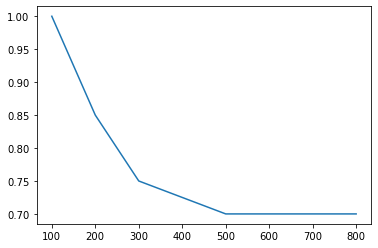

In [8]:
import matplotlib.pyplot as plt

# k_h = sp.Piecewise((1.0, h_0 == 100),
#                     (0.85, h_0 == 200),
#                     (0.75, h_0 == 300),
#                     (0.70, h_0 >= 500))

h_0_ = [100, 200 ,300, 500, 800]
k_h_ = [ 1, 0.85, 0.75, 0.7, 0.7 ]
plt.plot(h_0_, k_h_)
h_0 = 10000
k_h = np.interp(h_0, h_0_, k_h_)
k_h